https://github.com/nicknochnack/Reinforcement-Learning-for-Trading/blob/main/Reinforcement%20Learning%20GME%20Trading%20Tutorial.ipynb
https://www.section.io/engineering-education/leveraging-openai-gym-and-the-anytrading-environment-for-trading/

In [1]:
import gym
import gym_anytrading

d:\tools2\anaconda\envs\gym\lib\site-packages\ale_py\roms\__init__.py:89: DeprecationWarning: Automatic importing of atari-py roms won't be supported in future releases of ale-py. Please migrate over to using `ale-import-roms` OR an ALE-supported ROM package. To make this warning disappear you can run `ale-import-roms --import-from-pkg atari_py.atari_roms`.For more information see: https://github.com/mgbellemare/Arcade-Learning-Environment#rom-management
  ROMS = resolve_roms()


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# Stable baselines - rl stuff
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



d:\tools2\anaconda\envs\gym\lib\site-packages\stable_baselines\__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."
d:\tools2\anaconda\envs\gym\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df=pd.read_csv("teststock2.csv")

In [5]:
df.head()

,Date,Open,High,Low,Close,Volume
0,03/17/2023,16.62,16.72,15.92,16.60,"5,105,501"
1,03/16/2023,16.00,16.77,15.53,16.76,"4,093,282"
2,03/15/2023,16.50,16.69,15.70,15.95,"4,541,529"
3,03/14/2023,17.37,17.41,16.40,16.91,"3,077,400"
4,03/13/2023,16.77,17.35,16.52,16.75,"2,959,090"


In [6]:
len(df)

252

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['Volume'] = df['Volume'].apply(lambda x: float(x.replace(",", "")))
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
dtype: object

In [6]:
df.set_index('Date', inplace=True)
df.head()


,Open,High,Low,Close,Volume
Date,,,,,
2023-03-17,16.62,16.72,15.92,16.60,5105501.0
2023-03-16,16.00,16.77,15.53,16.76,4093282.0
2023-03-15,16.50,16.69,15.70,15.95,4541529.0
2023-03-14,17.37,17.41,16.40,16.91,3077400.0
2023-03-13,16.77,17.35,16.52,16.75,2959090.0


In [9]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,253), window_size=5)

In [10]:
env.observation_space

Box([[-inf -inf]
 [-inf -inf]
 [-inf -inf]
 [-inf -inf]
 [-inf -inf]], [[inf inf]
 [inf inf]
 [inf inf]
 [inf inf]
 [inf inf]], (5, 2), float64)

In [11]:
env.signal_features

array([[ 1.660e+01,  0.000e+00],
       [ 1.676e+01,  1.600e-01],
       [ 1.595e+01, -8.100e-01],
       [ 1.691e+01,  9.600e-01],
       [ 1.675e+01, -1.600e-01],
       [ 1.725e+01,  5.000e-01],
       [ 1.752e+01,  2.700e-01],
       [ 1.817e+01,  6.500e-01],
       [ 1.806e+01, -1.100e-01],
       [ 1.865e+01,  5.900e-01],
       [ 1.870e+01,  5.000e-02],
       [ 1.819e+01, -5.100e-01],
       [ 1.815e+01, -4.000e-02],
       [ 1.923e+01,  1.080e+00],
       [ 1.910e+01, -1.300e-01],
       [ 1.954e+01,  4.400e-01],
       [ 2.014e+01,  6.000e-01],
       [ 2.052e+01,  3.800e-01],
       [ 2.066e+01,  1.400e-01],
       [ 2.199e+01,  1.330e+00],
       [ 2.160e+01, -3.900e-01],
       [ 2.180e+01,  2.000e-01],
       [ 1.987e+01, -1.930e+00],
       [ 1.969e+01, -1.800e-01],
       [ 1.927e+01, -4.200e-01],
       [ 1.967e+01,  4.000e-01],
       [ 2.110e+01,  1.430e+00],
       [ 2.122e+01,  1.200e-01],
       [ 2.386e+01,  2.640e+00],
       [ 2.225e+01, -1.610e+00],
       [ 2

In [12]:
env.action_space

Discrete(2)

In [13]:
env.observation_space

Box([[-inf -inf]
 [-inf -inf]
 [-inf -inf]
 [-inf -inf]
 [-inf -inf]], [[inf inf]
 [inf inf]
 [inf inf]
 [inf inf]
 [inf inf]], (5, 2), float64)

info {'total_reward': -13.360000000000003, 'total_profit': 0.2564056957570536, 'position': 1}


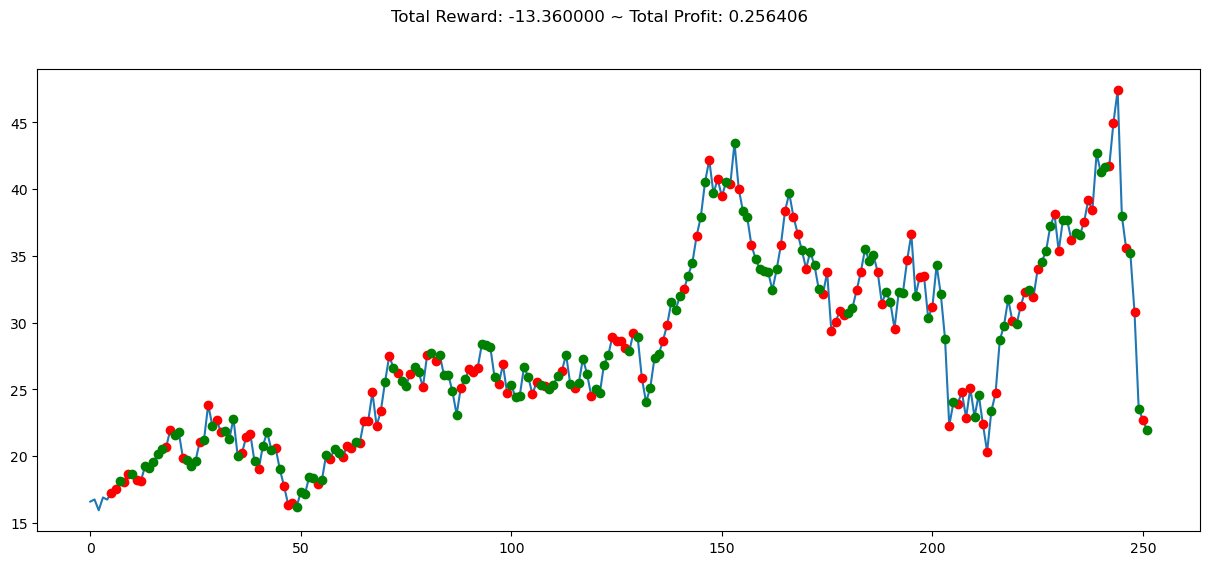

In [14]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [44]:
#env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
#env = DummyVecEnv([env_maker])

#Applying the Trading RL Algorithm
model = A2C('MlpPolicy', env, verbose=1) 
 
#setting the learning timesteps
model.learn(total_timesteps=100000)


Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 246      |
|    ep_rew_mean        | 19.5     |
| time/                 |          |
|    fps                | 246      |
|    iterations         | 100      |
|    time_elapsed       | 2        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.688   |
|    explained_variance | -0.0062  |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -1.39    |
|    value_loss         | 18.9     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 246      |
|    ep_rew_mean        | 12.7     |
| time/                 |          |
|    fps                | 257      |
|    iterations         | 200      |
|    time_elapsed

info {'total_reward': 3.8500000000000014, 'total_profit': 0.604663729616869, 'position': 0}


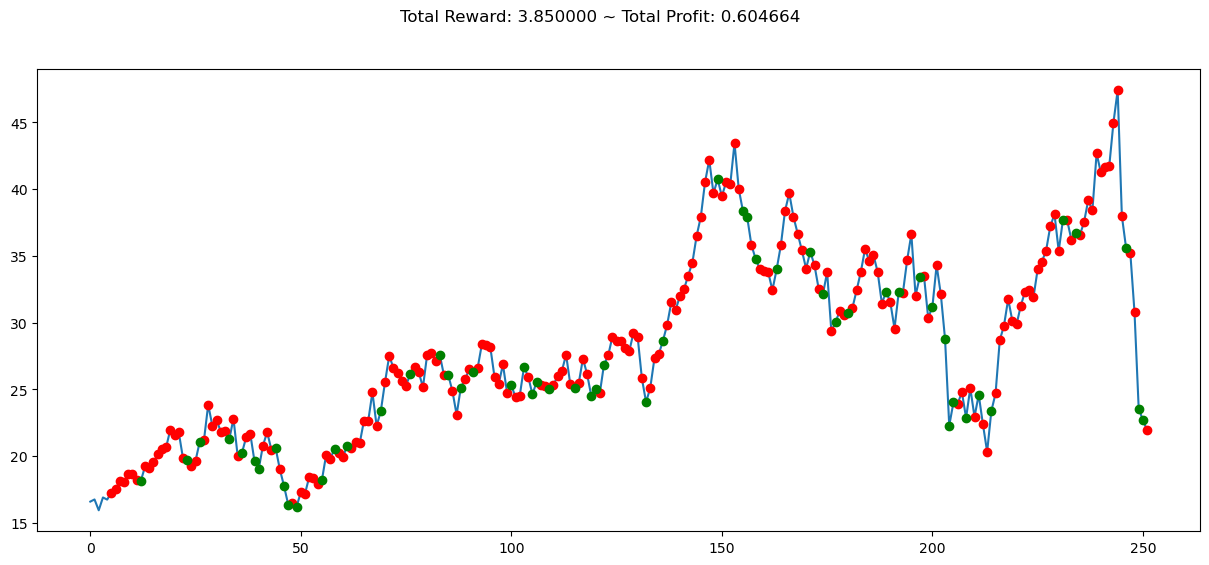

In [46]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,253), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [ ]:
obs = env.reset()
while True:
    action = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    plt.figure(figsize=(15,6))
    env.render_all()

In [30]:
df2=pd.read_csv("teststock.csv")
env2 = gym.make('stocks-v0', df=df2, frame_bound=(5,20), window_size=5)
env2.observation_space.shape
l=np.array(df2.Close)
model.predict(l.reshape((5,2)))

ValueError: cannot reshape array of size 22 into shape (5,2)

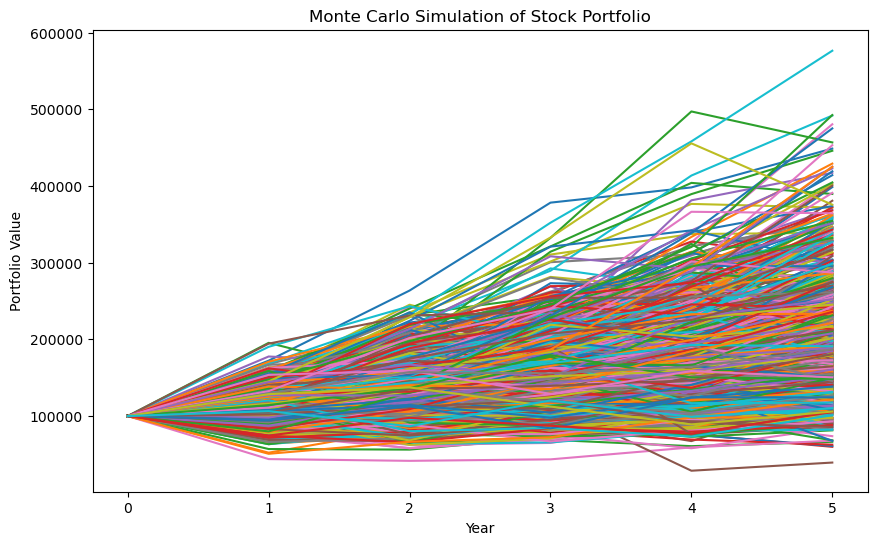

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define parameters
num_simulations = 1000  # number of simulations to run
num_years = 5  # number of years to simulate
initial_portfolio_value = 100000  # initial value of the portfolio
annual_contribution = 10000  # amount of annual contribution
mean_returns = 0.07  # mean annual return
volatility = 0.2  # annual volatility
correlation = 0.5  # correlation between stock returns

# Generate stock price data
num_months = num_years * 12
dates = pd.date_range(start='01/01/2020', periods=num_months, freq='MS')
stock_returns = np.random.multivariate_normal(
    mean=[mean_returns, mean_returns],
    cov=[[volatility ** 2, volatility * volatility * correlation],
         [volatility * volatility * correlation, volatility ** 2]],
    size=num_months)
stock_prices = initial_portfolio_value * np.cumprod(1 + stock_returns, axis=0)

# Run simulations
portfolio_values = np.zeros((num_simulations, num_years + 1))
for i in range(num_simulations):
    portfolio_value = initial_portfolio_value
    for j in range(num_years):
        portfolio_value += annual_contribution
        portfolio_value *= (1 + np.random.normal(mean_returns, volatility))
        portfolio_values[i, j + 1] = portfolio_value
    portfolio_values[i, 0] = initial_portfolio_value

# Plot results
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(num_simulations):
    ax.plot(range(num_years + 1), portfolio_values[i])
ax.set_xlabel('Year')
ax.set_ylabel('Portfolio Value')
ax.set_title('Monte Carlo Simulation of Stock Portfolio')
plt.show()

[[  100000.          7909820.68406781 11117178.00276798 11127178.00276798
  11137178.00276798 11147178.00276798]
 [  100000.         11095662.93530677 11105662.93530677 11115662.93530677
  11125662.93530677 11135662.93530677]
 [  100000.         10216809.90048223 11108839.50564089 11118839.50564089
  11128839.50564089 11138839.50564089]
 [  100000.          3076128.99253283 11134649.13960567 11144649.13960567
  11154649.13960567 11164649.13960567]
 [  100000.          8898530.34824541 11113604.36114208 11123604.36114208
  11133604.36114208 11143604.36114208]
 [  100000.          4614121.80347577  5616405.10927928 11042393.51929536
  11475238.28452897 11485238.28452897]
 [  100000.          7799964.05471474 11117575.07405974 11127575.07405974
  11137575.07405974 11147575.07405974]
 [  100000.          8678817.08953928 11114398.50372561 11124398.50372561
  11134398.50372561 11144398.50372561]
 [  100000.         10106953.27112916 10778475.47499816 11134176.86287153
  11144176.86287153 11

d:\tools2\anaconda\envs\gym\lib\site-packages\ipykernel_launcher.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


<bound method Axes.set_title of <AxesSubplot:xlabel='Year', ylabel='Portfolio Value'>>

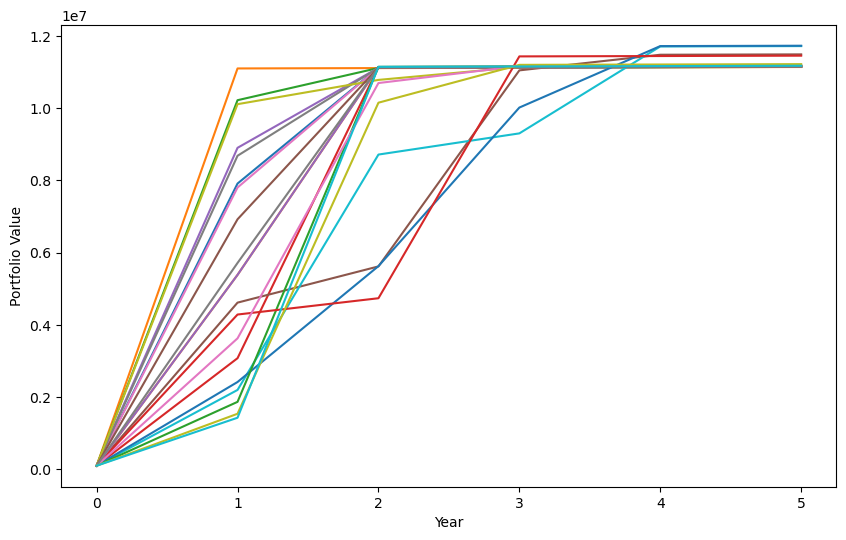

In [37]:
import gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class StockPortfolioEnv(gym.Env):
    def __init__(self, prices, max_shares=100, annual_contribution=10000):
        super(StockPortfolioEnv, self).__init__()
        self.prices = prices
        self.max_shares = max_shares
        self.annual_contribution = annual_contribution
        self.current_step = 0
        self.total_steps = len(prices) - 1
        self.action_space = gym.spaces.Discrete(max_shares + 1)
        self.observation_space = gym.spaces.Box(low=0, high=np.inf, shape=(2,), dtype=np.float32)

    def reset(self):
        self.current_step = 0
        self.portfolio_value = 100000
        self.shares_held = 0
        return np.array([self.portfolio_value, self.shares_held])

    def step(self, action):
        current_price = self.prices[self.current_step]
        self.current_step += 1

        # Compute the reward
        shares_bought = min(action, self.max_shares - self.shares_held)
        self.shares_held += shares_bought
        self.portfolio_value += shares_bought * current_price + self.annual_contribution
        reward = self.portfolio_value

        # Check if we have reached the end of the episode
        done = (self.current_step > self.total_steps)

        # Compute the next observation
        next_observation = np.array([self.portfolio_value, self.shares_held])

        # Return the observation, reward, done flag, and any additional information
        return next_observation, reward, done, {}

# Define parameters
num_simulations = 20  # number of simulations to run
num_years = 5  # number of years to simulate
initial_portfolio_value = 100000  # initial value of the portfolio
annual_contribution = 10000  # amount of annual contribution
mean_returns = 0.07  # mean annual return
volatility = 0.2  # annual volatility
correlation = 0.5  # correlation between stock returns

# Generate stock price data
num_months = num_years * 12
dates = pd.date_range(start='01/01/2020', periods=num_months, freq='MS')
stock_returns = np.random.multivariate_normal(
    mean=[mean_returns, mean_returns],
    cov=[[volatility ** 2, volatility * volatility * correlation],
         [volatility * volatility * correlation, volatility ** 2]],
    size=num_months)
stock_prices = initial_portfolio_value * np.cumprod(1 + stock_returns, axis=0)

# Create the Gym environment
env = StockPortfolioEnv(stock_prices)

# Run simulations
portfolio_values = np.zeros((num_simulations, num_years + 1))
for i in range(num_simulations):
    observation = env.reset()
    for j in range(num_years):
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        portfolio_values[i, j + 1] = observation[0][0]
    portfolio_values[i, 0] = initial_portfolio_value
print(portfolio_values)
# Plot results
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(num_simulations):
    ax.plot(range(num_years + 1), portfolio_values[i])
ax.set_xlabel('Year')
ax.set_ylabel('Portfolio Value')
ax.set_title

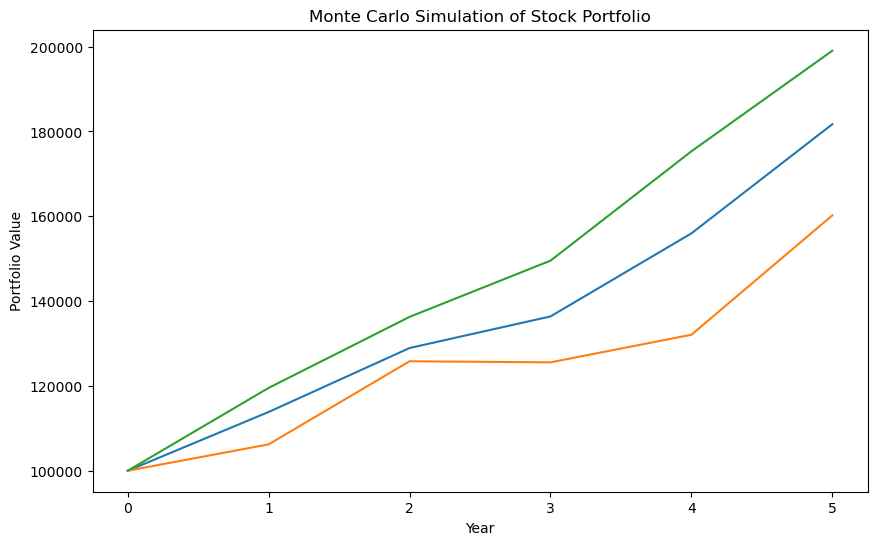

In [36]:


# Load stock data
prices = df['Close'].values

# Define simulation parameters
num_simulations = 1000  # number of simulations to run
num_years = 5  # number of years to simulate
initial_portfolio_value = 100000  # initial value of the portfolio
annual_contribution = 10000  # amount of annual contribution
mean_returns = 0.07  # mean annual return
volatility = 0.2  # annual volatility
correlation = 0.5  # correlation between stock returns

# Compute monthly returns
returns = np.log(prices[1:] / prices[:-1])
mean_return = np.mean(returns)
volatility = np.std(returns)
corr_matrix = np.array([[1, correlation], [correlation, 1]])
chol_matrix = np.linalg.cholesky(corr_matrix)
random_returns = np.random.normal(size=(num_years * 12, 2))
corr_returns = np.matmul(random_returns, chol_matrix.T)
returns = (mean_return + volatility * corr_returns[:, 1]) / 12

# Compute stock prices
stock_prices = initial_portfolio_value * np.cumprod(1 + returns)

# Run simulations
portfolio_values = np.zeros((num_simulations, num_years + 1))
for i in range(num_simulations):
    portfolio_value = initial_portfolio_value
    for j in range(num_years):
        portfolio_value = portfolio_value * (1 + np.random.normal(mean_returns, volatility) + annual_contribution / portfolio_value)
        portfolio_values[i, j + 1] = portfolio_value
    portfolio_values[i, 0] = initial_portfolio_value

# Plot results
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(3):
    ax.plot(range(num_years + 1), portfolio_values[i])
ax.set_xlabel('Year')
ax.set_ylabel('Portfolio Value')
ax.set_title('Monte Carlo Simulation of Stock Portfolio')
plt.show()

In [39]:
import numpy as np
import pandas as pd

# Load data from CSV file
data=pd.read_csv("teststock2.csv")
# Define Q-learning parameters
num_states = 100  # number of states
num_actions = 3   # number of actions (buy, sell, hold)
epsilon = 0.1     # exploration rate
alpha = 0.2       # learning rate
gamma = 0.9       # discount factor
max_episodes = 1000  # maximum number of episodes
max_steps = 100     # maximum number of steps per episode

# Define state and action functions
def discretize_state(observation):
    state = int(np.floor((observation - data.min()) / (data.max() - data.min() + 0.0001) * (num_states - 1)))
    return np.clip(state, 0, num_states - 1)

def choose_action(state, Q, epsilon):
    if np.random.uniform() < epsilon:
        # choose a random action
        action = np.random.choice(num_actions)
    else:
        # choose the action with the highest Q-value
        action = np.argmax(Q[state])
    return action

# Initialize Q-table
Q = np.zeros([num_states, num_actions])

# Train agent using Q-learning
for episode in range(max_episodes):
    # Reset environment
    state = 0
    total_reward = 0
    for step in range(max_steps):
        # Choose action
        action = choose_action(state, Q, epsilon)
        # Apply action to environment
        reward = data.iloc[state+1]['Close'] - data.iloc[state]['Close']
        next_state = discretize_state(data.iloc[state+1]['Close'])
        # Update Q-value
        Q[state, action] += alpha * (reward + gamma * np.max(Q[next_state,action]) - Q[state, action])
        # Update state and total reward
        state = next_state
        total_reward += reward
    # Print episode results
    print("Episode {}: Total reward = {}".format(episode+1, total_reward))

TypeError: unsupported operand type(s) for -: 'float' and 'str'

In [19]:
from stable_baselines import A2C
#from stable_baselines3.common.env_util import make_vec_en

In [16]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])

In [92]:
model_train = A2C('MlpLstmPolicy', env, verbose=1) 
model_train.learn(total_timesteps=100000)

ValueError: Policy MlpLstmPolicy unknown

https://towardsdatascience.com/deep-reinforcement-learning-for-automated-stock-trading-f1dad0126a02

In [125]:
class StockEnvTrain(gym.Env):
    metadata = {'render.modes': ['human']}
    def __init__(self, df, day = 0):
        self.day = day
        self.df = df
        self.action_space = spaces.Box(low = -1, high = 1,shape = (STOCK_DIM,)) 
 

        self.observation_space = spaces.Box(low=0, high=np.inf, shape = (181,))
 # load data from a pandas dataframe
        self.data = self.df.loc[self.day,:]
        self.terminal = False 
 # initalize state
        self.state = [INITIAL_ACCOUNT_BALANCE] + \
        self.data.adjcp.values.tolist() + \
        [0]*STOCK_DIM + \
        self.data.macd.values.tolist() + \
        self.data.rsi.values.tolist() + \
        self.data.cci.values.tolist() + \
        self.data.adx.values.tolist()
 # initialize reward
        self.reward = 0
        self.cost = 0
 # memorize all the total balance change
        self.asset_memory = [INITIAL_ACCOUNT_BALANCE]
        self.rewards_memory = []
        self.trades = 0
 #self.reset()
        self._seed()

In [126]:
from stable_baselines import SAC
from stable_baselines import PPO2
from stable_baselines import A2C
from stable_baselines import TD3
from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common.vec_env import DummyVecEnv


In [93]:
def train_A2C(env_train, model_name, timesteps=10000):
    start = time.time()
    model = A2C('MlpPolicy', env_train, verbose=0)
    model.learn(total_timesteps=timesteps)
    end = time.time()
    model.save(f'{config.TRAINED_MODEL_DIR}/{model_name}')
    print('Training time (A2C): ', (end-start)/60,' minutes')
    return model

def train_PPO(env_train, model_name, timesteps=50000):
    start = time.time()
    model = PPO2('MlpPolicy', env_train)
    model.learn(total_timesteps=timesteps)
    end = time.time()
    model.save(f'{config.TRAINED_MODEL_DIR}/{model_name}')
    print('Training time (PPO): ', (end-start)/60,' minutes')
    return model
def DRL_prediction(model, test_data, test_env, test_obs):
    start = time.time()
    for i in range(len(test_data.index.unique())):
        action, _states = model.predict(test_obs)
        test_obs, rewards, dones, info = test_env.step(action)
   # env_test.render()
    end = time.time()

In [84]:
import pyfolio
from pyfolio import *
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = ensemble_strat,benchmark_rets=dow_strat, set_context=False)

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


ImportError: DLL load failed: The specified procedure could not be found.

In [77]:
import time